# Semana 2: Dense Layers
#### Equipo 5:
Jackeline Conant Rubalcava A01280544 \
Javier Eduardo Corrales Cardoza A01742328 \
José Andrés Orantes Guillén A01174130 \
Francisco Salas Porras A01177893 \
Luis Mario Lozoya Chairez A00833364


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

Primero se cargan los datos que se usarán para el ejercicio. En este caso se utilizarán los datos de Fashion Mnist, este dataset cuenta con 70,000 imágenes en escala de grises en escala de 28x28. Se tienen 70,000 productos de moda de 10 diferentes categorías, 7,000 imágenes por categoría. El set de entrenamiento cuenta con 60,000 imágenes y el de prueba con 10,000.<br>
Tenemos el propósito de predecir las categorías de cada prenda a través de un modelo neuronal de capas densas.

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

y_test

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

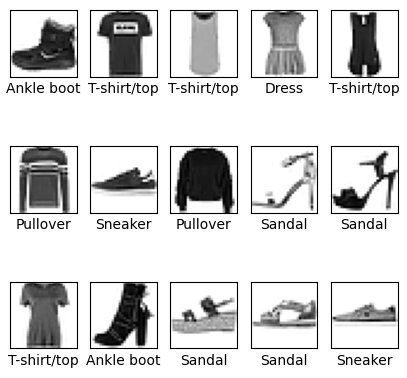

In [31]:
plt.figure(figsize=(5,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Iniciamos la construcción del modelo que realizará las predicciones de clasificación de cada imagen.

In [32]:
model = tf.keras.models.Sequential(
[keras.Input(shape=input_shape),
layers.Dense(num_classes, activation="relu")
]
)

NameError: name 'input_shape' is not defined